<a href="https://colab.research.google.com/github/leokqq27/keras_IMDB_binary_classification/blob/main/Keras2_8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/F0380/ch02')
print(sys.path)

['/content/drive/MyDrive/Colab Notebooks/F0380/ch02', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#載入imdb資料集
(a_train,b_train),(a_test,b_test) = imdb.load_data(num_words=10000) 

#資料預處理
tok = Tokenizer(num_words=10000)
x_train = tok.sequences_to_matrix(a_train)
x_test = tok.sequences_to_matrix(a_test)

y_train = b_train.astype('float32')
y_test = b_test.astype('float32')

#建立模型
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=10000)) #輸入層
model.add(Dense(16,activation='relu'))  #隱藏層
model.add(Dense(1,activation='sigmoid')) #輸出層

#編譯模型
model.compile(loss='binary_crossentropy',
        optimizer='rmsprop',
        metrics=['acc'])

#訓練及驗證模型
history = model.fit(x_train,y_train,
          batch_size=512,
          epochs =10,
          validation_split=0.2)


Epoch 1/10
40/40 [==============================] - 2s 27ms/step - loss: 0.4461 - acc: 0.8202 - val_loss: 0.3371 - val_acc: 0.8776
Epoch 2/10
40/40 [==============================] - 1s 21ms/step - loss: 0.2606 - acc: 0.9092 - val_loss: 0.3783 - val_acc: 0.8434
Epoch 3/10
40/40 [==============================] - 1s 21ms/step - loss: 0.1983 - acc: 0.9327 - val_loss: 0.2767 - val_acc: 0.8894
Epoch 4/10
40/40 [==============================] - 1s 21ms/step - loss: 0.1633 - acc: 0.9424 - val_loss: 0.2781 - val_acc: 0.8900
Epoch 5/10
40/40 [==============================] - 1s 23ms/step - loss: 0.1387 - acc: 0.9530 - val_loss: 0.2895 - val_acc: 0.8890
Epoch 6/10
40/40 [==============================] - 1s 21ms/step - loss: 0.1182 - acc: 0.9604 - val_loss: 0.3090 - val_acc: 0.8870
Epoch 7/10
40/40 [==============================] - 1s 21ms/step - loss: 0.0992 - acc: 0.9674 - val_loss: 0.3413 - val_acc: 0.8814
Epoch 8/10
40/40 [==============================] - 1s 21ms/step - loss: 0.0866 - a

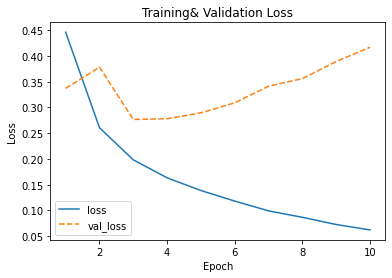

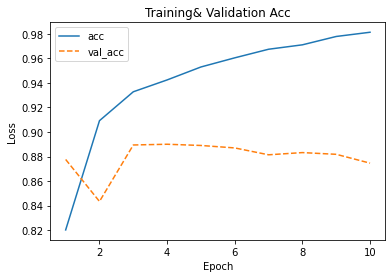

In [7]:
#F
import util2 as u
u.plot(history.history,
    ('loss','val_loss'),
    'Training& Validation Loss',
    ('Epoch','Loss'))

u.plot(history.history,
    ('acc','val_acc'),
    'Training& Validation Acc',
    ('Epoch','Loss'))


In [9]:
#測試資料評估成效

history = model.fit(x_train,y_train,
          batch_size=512,
          epochs=4,
          verbose=1)
loss,acc=model.evaluate(x_test,y_test)
print('準確率:',acc)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0525 - acc: 0.9836
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.0439 - acc: 0.9876
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0350 - acc: 0.9907
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.6421 - acc: 0.8544
準確率: 0.8543599843978882


In [14]:
model.predict(x_test[0:5])
(model.predict(x_test[0:5]) > 0.5).astype("int32")

array([0., 1., 1., 0., 1.], dtype=float32)